# 1) Import texts and preprocess 

In [9]:
import pandas as pd
import numpy as np

import plotly 
import plotly.plotly as py
import plotly.graph_objs as go

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
import nltk
import string




In [10]:
data = pd.read_excel('ecb_pressconferences.xlsx', header = 0, na_values = 'NaN')
type(data.text[0])
# data.text[0].count(' ')
data.text[0]
print(type(data))
print(data.shape)
data.text[0]
# Example text, latest pressconference in 2017 before preprocessing

<class 'pandas.core.frame.DataFrame'>
(214, 4)


"Based on our regular economic and monetary analyses, we decided to keep the key ECB interest rates unchanged. We continue to expect them to remain at their present levels for an extended period of time, and well past the horizon of our net asset purchases.\n\nRegarding non-standard monetary policy measures, we confirm that from January 2018 we intend to continue to make net asset purchases under the asset purchase programme (APP), at a monthly pace of €30 billion, until the end of September 2018, or beyond, if necessary, and in any case until the Governing Council sees a sustained adjustment in the path of inflation consistent with its inflation aim. If the outlook becomes less favourable, or if financial conditions become inconsistent with further progress towards a sustained adjustment in the path of inflation, we stand ready to increase the APP in terms of size and/or duration. The Eurosystem will reinvest the principal payments from maturing securities purchased under the APP for 

# !!! Please modify this one as follows: strip legend, indicate every year in timeline and get rid of 'date', the line should have three different colors, one from the beginning until November 2003 and should be refered to as "Duisenberg", the other color from November 2003 until November 2011 refering to "Trichet" and the last color from November 2011 until the end refering to "Draghi". Furthermore there should be a dottet vertical, grey and transparent line at May 8 2003 

In [ ]:
•	Beginning – 31. October 2003: Wim Duisenberg
•	1. November 2003 – 31. October 2011: Jean-Claude Trichet
•	1. November 2011 – End: Mario Draghi


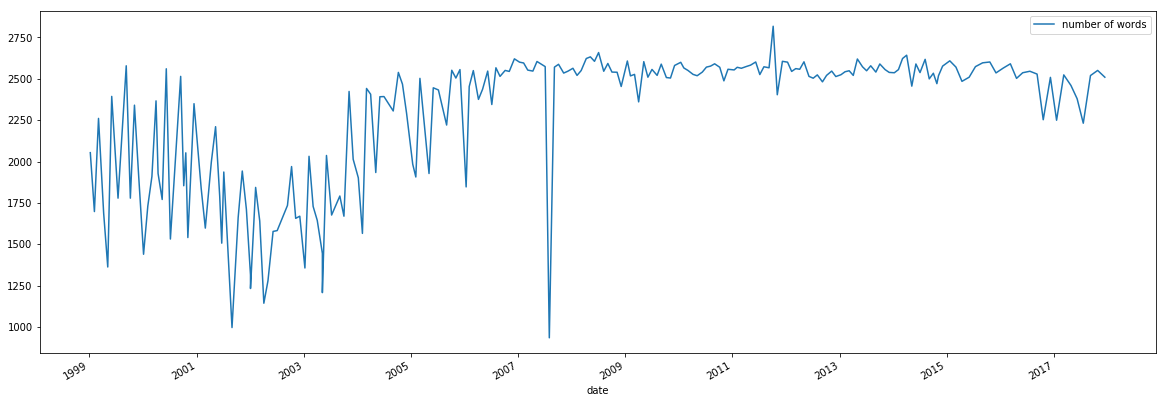

In [57]:
aaa = data.text.tolist()

nr = range(214)
bbb =[]
for x in nr:
    ccc = aaa[x].count(" ")
    
    bbb.append(ccc)
    
# create DataFrame
iindexx = pd.to_datetime(data.date, errors = 'coerce')
datum = data.date
ddd = pd.DataFrame(bbb, iindexx)
ddd.columns = ['number of words']

ddd.plot(kind='line', figsize=(20,7))
# ddd.head()
# ddd['2003']
# Nr of words per press conference 

In [467]:

# plotly.tools.set_credentials_file(username='ludepo', api_key='KiRRaJ65AuPTEE682RKs')

# pltframe = [go.Scatter(x=ddd.index, y=ddd['number of words'])]

# py.iplot(pltframe)

In [13]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
import nltk
import string

print1 = data.text[0] # string
conference1 = print1.replace('-',' ')
token = word_tokenize(conference1.lower()) # tokenize and lowercase, list of strings
tokenpunct = [word for word in token if word.isalpha()] # stripped punctuation and numbers, list of strings


print(len(token))
print(len(tokenpunct))
print2 = " ".join(tokenpunct) # sting


stop_words = stopwords.words('english')
stop_words = [w.lower() for w in stop_words]
stop_words.append('question')
stop_words.append('mario')
stop_words.append('draghi')
stop_words.append('guindos')
stop_words.append('constancio')
stop_words.append('jean')
stop_words.append('claude')
stop_words.append('trichet')
stop_words.append('papademos')
stop_words.append('wim')
stop_words.append('duisenberg')
stop_words.append('noyer')
stop_words.append('answer')
stop_words.append('say')
stop_words.append('mr')
stop_words.append('would')
stop_words.append('also')
stop_words.append('nt')
stop_words.append('see')
stop_words.append('one')
stop_words.append('first')
tokenstopw = [w for w in tokenpunct if not w in stop_words] # list of strings


print(len(tokenstopw))
print3 = " ".join(tokenstopw)


def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None  

tagged = nltk.pos_tag(tokenstopw)
lemmatizer = WordNetLemmatizer()
tokenlem = []                              # list of strings
    
for word, tag in tagged:
    wntag = get_wordnet_pos(tag)
    if wntag is None: 
        lemma = lemmatizer.lemmatize(word) 
    else:
        lemma = lemmatizer.lemmatize(word, pos=wntag)
    tokenlem.append(lemma) 

    
print(len(tokenlem))   
print4 = " ".join(tokenlem)
# print3[0:500]


ps = PorterStemmer()
tokenstem = []
for w in tokenlem:
    tokenstem.append(ps.stem(w))

    
print(len(tokenstem))
print5 = " ".join(tokenstem)


tokenprepr = [w for w in tokenstem if not w in stop_words]

print(len(tokenprepr))
print6 = " ".join(tokenprepr)

print(print1[258:657])
print(print2[253:628])
print(print3[184:458])
print(print4[177:440])
print(print5[169:412])


6145
5379
2533
2533
2533
2507
Regarding non-standard monetary policy measures, we confirm that from January 2018 we intend to continue to make net asset purchases under the asset purchase programme (APP), at a monthly pace of €30 billion, until the end of September 2018, or beyond, if necessary, and in any case until the Governing Council sees a sustained adjustment in the path of inflation consistent with its inflation aim. 
regarding non standard monetary policy measures we confirm that from january we intend to continue to make net asset purchases under the asset purchase programme app at a monthly pace of billion until the end of september or beyond if necessary and in any case until the governing council sees a sustained adjustment in the path of inflation consistent with its inflation aim
regarding non standard monetary policy measures confirm january intend continue make net asset purchases asset purchase programme app monthly pace billion end september beyond necessary case gov

In [14]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
import nltk
import string


# preprocessor tokenizes texts first, then strips punctiation, numbers and stopwords (meaningless words) and converts
# entire text to lowercase, Part-of-Speech-tags words to lemmatize subsequently, stem tokens and finally filter for stopwwords
# again. Tokens are joint as a sting and returned.


def preprocessor(clean):
    
    cleann = clean.replace('-', ' ')
    tokens = word_tokenize(cleann.lower()) # tokenize text and transform to lowercase
  
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens] # stripped = list
    words = [word for word in stripped if word.isalpha()] # words = list 

    stop_words = stopwords.words('english')
    stop_words = [w.lower() for w in stop_words]

    stop_words.append('question')
    stop_words.append('mario')
    stop_words.append('draghi')
    stop_words.append('guindos')
    stop_words.append('constancio')
    stop_words.append('jean')
    stop_words.append('claude')
    stop_words.append('trichet')
    stop_words.append('papademos')
    stop_words.append('wim')
    stop_words.append('duisenberg')
    stop_words.append('noyer')
    stop_words.append('answer')
    stop_words.append('say')
    stop_words.append('mr')
    stop_words.append('would')
    stop_words.append('also')
    stop_words.append('nt')
    stop_words.append('see')
    stop_words.append('one')
    stop_words.append('first')

    words_cleaned = [w for w in words if not w in stop_words] 

    def get_wordnet_pos(treebank_tag):

        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return None # for easy if-statement 
    
    lemmatizer = WordNetLemmatizer()
    tagged = nltk.pos_tag(words_cleaned)
    lemmatized = []
    
    for word, tag in tagged:
        wntag = get_wordnet_pos(tag)
        if wntag is None:# not supply tag in case of None
            lemma = lemmatizer.lemmatize(word) 
        else:
            lemma = lemmatizer.lemmatize(word, pos=wntag)
        lemmatized.append(lemma)

    ps = PorterStemmer()
    stemmed = []
    for w in lemmatized:
        stemmed.append(ps.stem(w))

    words_preprocessed = [w for w in stemmed if not w in stop_words]
     
    text_preprocessed = " ".join(words_preprocessed)
   
    return text_preprocessed


def dataframe_preprocessor(frame):
   
    for cell in ['text']:
        frame[cell] = frame[cell].apply(preprocessor)
    
    return frame

dataframe_preprocessed = dataframe_preprocessor(data)
dataframe_preprocessed.head()

# dataframe with preprocessed texts

,date,headline,text,type of publication
0,2017-12-14,"Mario Draghi, Vítor Constâncio: Introductory s...",base regular econom monetari analysi decid kee...,Press conferences in 2017
1,2017-10-26,"Mario Draghi, Vítor Constâncio: Introductory s...",base regular econom monetari analysi today con...,Press conferences in 2017
2,2017-09-07,"Mario Draghi, Vítor Constâncio: Introductory s...",base regular econom monetari analysi decid kee...,Press conferences in 2017
3,2017-07-20,"Mario Draghi, Vítor Constâncio: Introductory s...",base regular econom monetari analysi decid kee...,Press conferences in 2017
4,2017-06-08,"Mario Draghi, Vítor Constâncio: Introductory s...",base regular econom monetari analysi decid kee...,Press conferences in 2017


In [15]:
dataframe_preprocessed.shape
dataframe_preprocessed.head()

,date,headline,text,type of publication
0,2017-12-14,"Mario Draghi, Vítor Constâncio: Introductory s...",base regular econom monetari analysi decid kee...,Press conferences in 2017
1,2017-10-26,"Mario Draghi, Vítor Constâncio: Introductory s...",base regular econom monetari analysi today con...,Press conferences in 2017
2,2017-09-07,"Mario Draghi, Vítor Constâncio: Introductory s...",base regular econom monetari analysi decid kee...,Press conferences in 2017
3,2017-07-20,"Mario Draghi, Vítor Constâncio: Introductory s...",base regular econom monetari analysi decid kee...,Press conferences in 2017
4,2017-06-08,"Mario Draghi, Vítor Constâncio: Introductory s...",base regular econom monetari analysi decid kee...,Press conferences in 2017


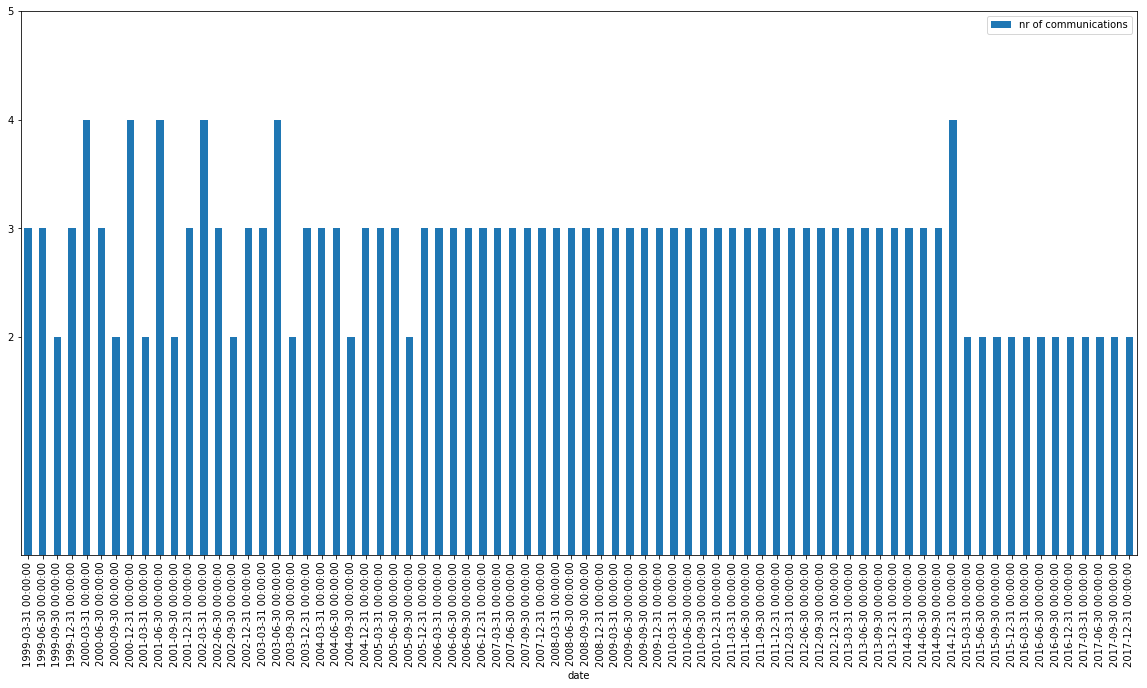

In [16]:
dataframe_preprocessednew = dataframe_preprocessed
dataframe_preprocessednew['nr of communications']= 1

df_preprnew = dataframe_preprocessednew.drop(columns=['headline','text','type of publication'])
# df_preprnew['date']=pd.to_datetime(df_preprnew['date'], errors = 'coerce')
df_preprnew=df_preprnew.set_index(iindexx)

df_preprnew = df_preprnew.resample('Q').sum().sort_index(ascending = True)


df_preprnew.plot(kind='bar', yticks=[2,3,4,5],figsize=(20,10))




# Nr. of press conferences per quarter

# 2) Build corpus and create term-frequency-inverse-document-frequency matrix

In [17]:
corpus = dataframe_preprocessed.text.tolist()
print(type(corpus)) 
print(type(corpus[0]))
print(len(corpus)) 
print(len(corpus[0]))
print(corpus[213].count(" "))
corpus[0]



# corpus with preprocessed press conferences

<class 'list'>
<class 'str'>
214
16656
2054


'base regular econom monetari analysi decid keep key ecb interest rate unchang continu expect remain present level extend period time well past horizon net asset purchas regard non standard monetari polici measur confirm januari intend continu make net asset purchas asset purchas programm app monthli pace billion end septemb beyond necessari case govern council sustain adjust path inflat consist inflat aim outlook becom less favour financi condit becom inconsist progress toward sustain adjust path inflat stand readi increas app term size andor durat eurosystem reinvest princip payment matur secur purchas app extend period time end net asset purchas case long necessari contribut favour liquid condit appropri monetari polici stanc monetari polici decis preserv favour financ condit still need sustain return inflat rate toward level close incom inform includ new staff project indic strong pace econom expans signific improv growth outlook strong cyclic momentum signific reduct econom slack 

pandas.core.frame.DataFrame

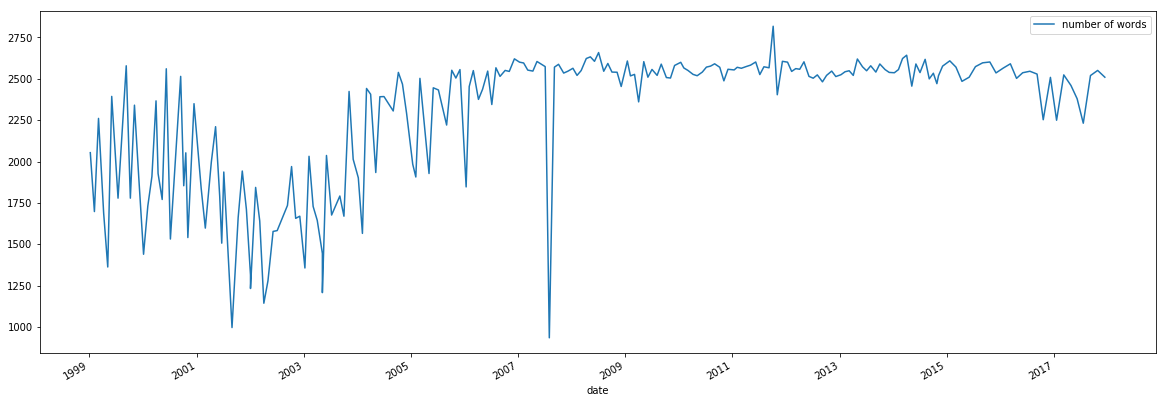

In [18]:
nrr = range(214)
acac=[]
for x in nrr:
    ababab = corpus[x].count(" ")
    
    acac.append(ababab)
    
# create DataFrame
abab = pd.DataFrame(acac, iindexx)
abab.columns = ['number of words']
abab.plot(kind = 'line', figsize=(20,7))

type(abab)
# Nr. of words after preprocessing

# !!! For this graph: strip legend, convert y-axis *100 and add %, x-axis: every year should be shown

pandas.core.frame.DataFrame

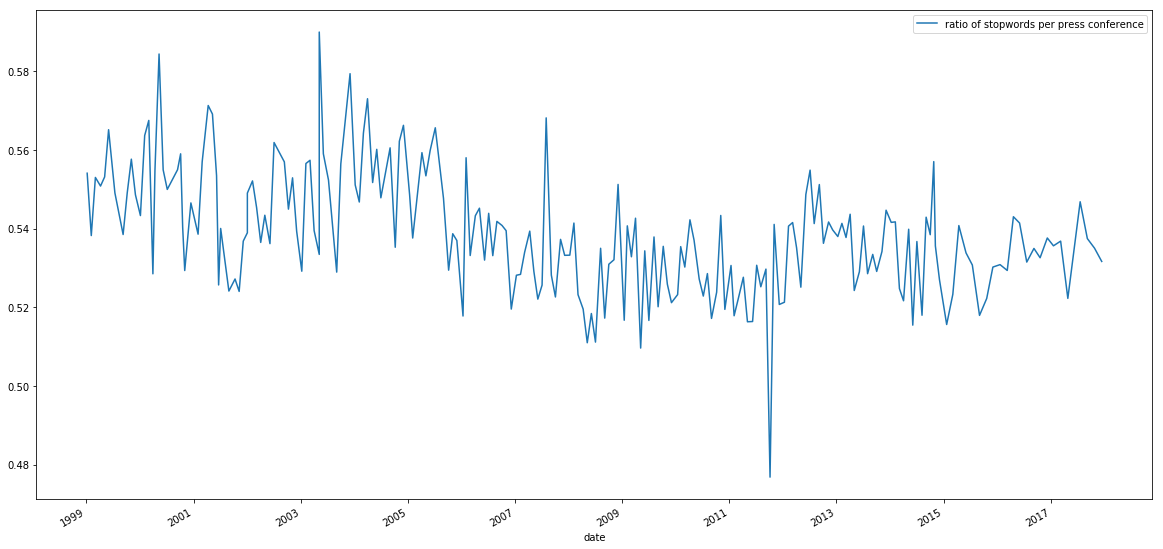

In [19]:
# development stopwords

nr_stop = ddd.sub(abab)
nr_stopperc = nr_stop.divide(ddd)
nr_stopperc.columns = ['ratio of stopwords per press conference']
nr_stopperc.plot(kind = 'line', figsize=(20,10))

type(nr_stopperc)

# ratio of stopwords erased

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus) # tfidf = sparse csr-matrix


print(type(tfidf))
tfidf.shape
# TF-IDF

<class 'scipy.sparse.csr.csr_matrix'>


(214, 6100)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

words = tfidf_vectorizer.get_feature_names()

# get 25 most important terms of corpus:
feature_array = np.array(words)
tfidf_sorting = np.argsort(tfidf.toarray()).flatten()[::-1]
top_25 = feature_array[tfidf_sorting][:25]
print("Most important 25 terms: {}".format(top_25))

# get 25 most frequent words
vectorizer = CountVectorizer()
tf = vectorizer.fit_transform(corpus)
words1 = vectorizer.get_feature_names()
feature_array1 = np.array(words1)
tf_sorting = np.argsort(tf.toarray()).flatten()[::-1]
frequent_25 = feature_array1[tf_sorting][:25]
print("Most frequent 25 terms: {}".format(frequent_25))


# Below the 25 most important words indicated by the tfidf matrix are shown as well as the 25 most frequent words

Most important 25 terms: ['rate' 'error' 'gold' 'day' 'teeth' 'euro' 'problem' 'exchang' 'payment'
 'target' 'euphoria' 'human' 'govern' 'bank' 'forese' 'system' 'settl'
 'council' 'januari' 'price' 'market' 'oper' 'develop' 'reserv' 'calendar']
Most frequent 25 terms: ['rate' 'euro' 'govern' 'day' 'problem' 'exchang' 'bank' 'council' 'price'
 'market' 'target' 'system' 'develop' 'time' 'interest' 'futur' 'today'
 'polici' 'issu' 'oper' 'januari' 'indic' 'decis' 'forese' 'monetari']


# 3) Derive topics from corpus via NMF

In [22]:
type(dataframe_preprocessed.date)
index = pd.to_datetime(dataframe_preprocessed.date, errors = 'coerce')
type(index)

pandas.core.series.Series

In [470]:
from sklearn.decomposition import NMF
import numpy as np


# Non-negative Matrix Factorization (NMF) allows to classify texts and leads to similar outputs as probablistic Latent
# Semantic Analysis. Comparing outputs containing different quanities of topics derived led to best results of regression 
# if _____ (currently 15)  topics are to be derived

index = pd.to_datetime(dataframe_preprocessed.date, errors = 'coerce')
idx_to_word = np.array(tfidf_vectorizer.get_feature_names())


# for 3 topics:
model3 = NMF(n_components=3)

W3 = nmf = model3.fit_transform(tfidf)        # W = Tocpics to document
H3 = model3.components_                       # H = Terms to topic, factorization matrix
                       
# for i, topic in enumerate(H3):
 
#     print("Topic {}: {}".format(i, ", ".join([str(x) for x in idx_to_word[topic.argsort()[-15:]]])))
    
# Currently the attribution for each row in W is not a percentage, but we want to assign each document to any topic which it can be at least 10% attributed to
sums = np.sum(W3, axis=1)
W3_percent = W3 / sums[:, None]

df3 = pd.DataFrame(W3_percent, index)




# for 5 topics:
model5 = NMF(n_components=5)

W5 = nmf = model5.fit_transform(tfidf)        # W = Tocpics to document
H5 = model5.components_                       # H = Terms to topic, factorization matrix
                       
# for i, topic in enumerate(H5):
 
#     print("Topic {}: {}".format(i, ", ".join([str(x) for x in idx_to_word[topic.argsort()[-15:]]])))
    
# Currently the attribution for each row in W is not a percentage, but we want to assign each document to any topic which it can be at least 10% attributed to
sums = np.sum(W5, axis=1)
W5_percent = W5 / sums[:, None]

df5 = pd.DataFrame(W5_percent, index)



# for 6 topics:
model6 = NMF(n_components=6)

W6 = nmf = model6.fit_transform(tfidf)        # W = Tocpics to document
H6 = model6.components_                       # H = Terms to topic, factorization matrix
                       
# for i, topic in enumerate(H5):
 
#     print("Topic {}: {}".format(i, ", ".join([str(x) for x in idx_to_word[topic.argsort()[-15:]]])))
    
# Currently the attribution for each row in W is not a percentage, but we want to assign each document to any topic which it can be at least 10% attributed to
sums = np.sum(W6, axis=1)
W6_percent = W6 / sums[:, None]

df6 = pd.DataFrame(W6_percent, index)


                   
# for 7 topics:
model7 = NMF(n_components=7)

W7 = nmf = model7.fit_transform(tfidf)        # W = Tocpics to document
H7 = model7.components_                       # H = Terms to topic, factorization matrix
                       
# for i, topic in enumerate(H5):
 
#     print("Topic {}: {}".format(i, ", ".join([str(x) for x in idx_to_word[topic.argsort()[-15:]]])))
    
# Currently the attribution for each row in W is not a percentage, but we want to assign each document to any topic which it can be at least 10% attributed to
sums = np.sum(W7, axis=1)
W7_percent = W7 / sums[:, None]

df7 = pd.DataFrame(W7_percent, index)                   
                   

                   
# for 8 topics:
model8 = NMF(n_components=8)

W8 = nmf = model8.fit_transform(tfidf)        # W = Tocpics to document
H8 = model8.components_                       # H = Terms to topic, factorization matrix
                       
# for i, topic in enumerate(H5):
 
#     print("Topic {}: {}".format(i, ", ".join([str(x) for x in idx_to_word[topic.argsort()[-15:]]])))
    
# Currently the attribution for each row in W is not a percentage, but we want to assign each document to any topic which it can be at least 10% attributed to
sums = np.sum(W8, axis=1)
W8_percent = W8 / sums[:, None]

df8 = pd.DataFrame(W8_percent, index)                      
                   
                   

# for 10 topics
model = NMF(n_components=10)

W10 = nmf = model.fit_transform(tfidf)        # W = Tocpics to document
H10 = model.components_                       # H = Terms to topic, factorization matrix
                       
# for i, topic in enumerate(H10):
 
#     print("Topic {}: {}".format(i, ", ".join([str(x) for x in idx_to_word[topic.argsort()[-15:]]])))
    
# Currently the attribution for each row in W is not a percentage, but we want to assign each document to any topic which it can be at least 10% attributed to
sums = np.sum(W10, axis=1)
W10_percent = W10 / sums[:, None]

df10 = pd.DataFrame(W10_percent, index)




#for 15 topics:
model = NMF(n_components=15)

W15 = nmf = model.fit_transform(tfidf)        # W = Tocpics to document
H15 = model.components_                       # H = Terms to topic, factorization matrix
# for i, topic in enumerate(H15):                       

#     print("Topic {}: {}".format(i, ", ".join([str(x) for x in idx_to_word[topic.argsort()[-15:]]])))
    
# Currently the attribution for each row in W is not a percentage, but we want to assign each document to any topic which it can be at least 10% attributed to
sums = np.sum(W15, axis=1)
W15_percent = W15 / sums[:, None]

df15 = pd.DataFrame(W15_percent, index)


df5[20:70]

,0,1,2,3,4
date,,,,,
2015-06-03,0.110193,0.282584,0.009299,0.554103,0.043821
2015-04-15,0.000000,0.172753,0.071014,0.690028,0.066205
2015-03-05,0.000000,0.359732,0.000000,0.569661,0.070607
2015-01-22,0.027436,0.213099,0.000000,0.664324,0.095141
2014-12-04,0.094543,0.115912,0.040442,0.749103,0.000000
2014-11-06,0.000000,0.408095,0.000000,0.503135,0.088770
2014-10-26,0.000000,1.000000,0.000000,0.000000,0.000000
2014-10-02,0.000000,0.255101,0.010881,0.650935,0.083084
2014-09-04,0.000000,0.300106,0.000000,0.699894,0.000000


In [471]:

def print_top_words(feature_names, n_top_words):
    for topic_idx, topic in enumerate(H5):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print() 
    
nnmf = print_top_words(feature_array1, 20)


Topic #0:
price growth stabil risk rate term market euro inflat area monetari econom increas regard medium level expect council oil analysi
Topic #1:
bank euro area market ecb omt govern countri monetari think ltro second rate risk polici financi time credit price bond
Topic #2:
euro rate growth price area develop ecb year econom polici monetari govern presid exchang interest council stabil today take time
Topic #3:
inflat rate polici monetari purchas programm qe growth time second low measur discuss expect recoveri go asset continu area econom
Topic #4:
rate govern term expect take market euro bank inflat area remain financi decis measur price council medium regard continu growth



In [472]:
# model = NMF()

# W = nmf = model.fit_transform(tfidf)        # W = Tocpics to document
# H = model.components_                       # H = Terms to topic, factorization matrix
                       
# # for i, topic in enumerate(H5):
 
# #     print("Topic {}: {}".format(i, ", ".join([str(x) for x in idx_to_word[topic.argsort()[-15:]]])))
    
# # Currently the attribution for each row in W is not a percentage, but we want to assign each document to any topic which it can be at least 10% attributed to
# sums = np.sum(W, axis=1)
# W_percent = W / sums[:, None]

# df = pd.DataFrame(W_percent, index)

# TAKES TOO LONG TO RUN

In [473]:
df5.columns = ['macroeconomic environment', 'banking sector', 'Eurozone and Euro', 'monetary policy', 'financial crisis']
# df5

# !!! Please adjust the axis (y-axis in 100%, 80%,... and x-axis every year shown without 'date'), The colors are good but the legend should be shown in a better place. maybe on top of the graph next to each others if possible



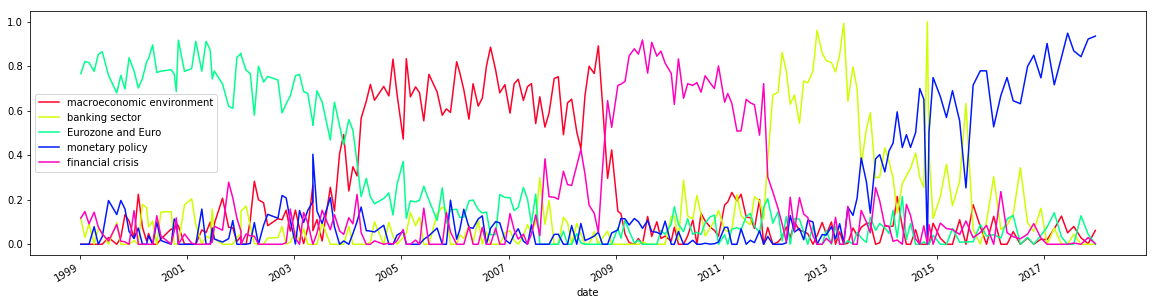

In [474]:
# df3.plot(kind='line', yticks=[0,0.2,0.4,0.6,0.8,1], colormap='gist_rainbow',figsize=(20,5))
df5.plot(kind='line', yticks=[0,0.2,0.4,0.6,0.8,1], colormap='gist_rainbow',figsize=(20,5))
# df6.plot(kind='line', yticks=[0,0.2,0.4,0.6,0.8,1], colormap='gist_rainbow',figsize=(20,5))
# df7.plot(kind='line', yticks=[0,0.2,0.4,0.6,0.8,1], colormap='gist_rainbow',figsize=(20,5))
# df8.plot(kind='line', yticks=[0,0.2,0.4,0.6,0.8,1], colormap='gist_rainbow',figsize=(20,5))
# df10.plot(kind='line', yticks=[0,0.2,0.4,0.6,0.8,1], colormap='winter',figsize=(20,5))
# df15.plot(kind='line', yticks=[0,0.2,0.4,0.6,0.8,1], colormap='gist_rainbow',figsize=(20,5))

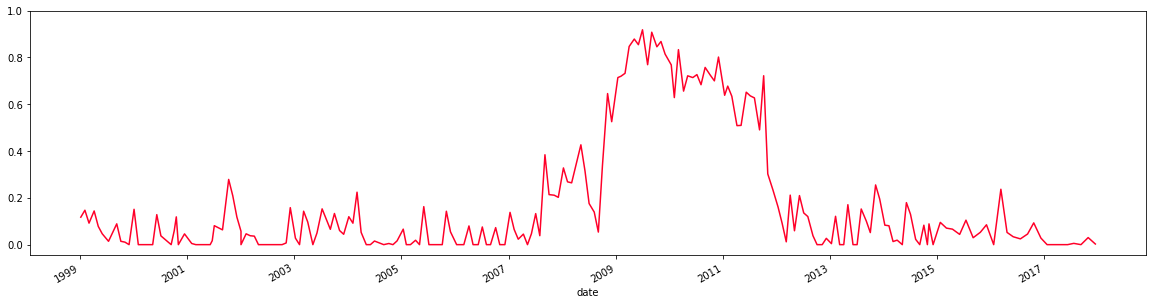

In [97]:
df5[4].plot(kind='line', yticks=[0,0.2,0.4,0.6,0.8,1], colormap='gist_rainbow',figsize=(20,5))

In [182]:
# If more than _____ (again comparing results to derive optimal value, currently 10% 'topic limit') percent of the text was
# devoted to a derived topic, it counted as mentioned. The code below counts the number of mentionings of the subsequent 
# topic per quarter.





# WICHTIG!!! Werte der Matrix müssen durch sich selbst geteilt werden, damit prozente ableitbar sind! (Github: https://github.com/ewellinger/election_analysis)
# Check percent_treshold in NMF clustering

#How many latent topics should we look for?
#Rundown of the challenges associated with trying to determine the number of topics to factorize into. Include nmf_similarity plot and give a rundown of the thinking behind it as well as the PCA scree plot that gives another approach to the same question.




def topic_selector(value):
    if value < 0.2:
        return 0
    else:
        return 1
        
        
def dataframe_topics(data, i):
    for cell in [i]:
        data[cell] = data[cell].apply(topic_selector)
  
    return data


ii = [0,1,2]
jj = ['macroeconomic environment', 'banking sector', 'Eurozone and Euro', 'monetary policy', 'financial crisis']
j6 = [0,1,2,3,4,5]
j7 = [0,1,2,3,4,5,6]
j8 = [0,1,2,3,4,5,6,7]
kk = [0,1,2,3,4,5,6,7,8,9]
ll = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
      
for i in ii:
    dfw3 = dataframe_topics(df3,i)
dfw3 = dfw3.resample('Q',).sum().sort_index(ascending = False) # summarize mentions during quarter
    
    
for i in jj:
    dfw5 = dataframe_topics(df5,i)
dfw5 = dfw5.resample('Q',).sum().sort_index(ascending = False) # summarize mentions during quarter

for i in j6:
    dfw6 = dataframe_topics(df6,i)
dfw6 = dfw6.resample('Q',).sum().sort_index(ascending = False) # summarize mentions during quarter

for i in j7:
    dfw7 = dataframe_topics(df7,i)
dfw7 = dfw7.resample('Q',).sum().sort_index(ascending = False) # summarize mentions during quarter

for i in j8:
    dfw8 = dataframe_topics(df8,i)
dfw8 = dfw8.resample('Q',).sum().sort_index(ascending = False) # summarize mentions during quarter


for i in kk:
    dfw10 = dataframe_topics(df10,i) 
dfw10 = dfw10.resample('Q',).sum().sort_index(ascending = False) # summarize mentions during quarter
    
for i in ll:
    dfw15 = dataframe_topics(df15,i)
dfw15 = dfw15.resample('Q',).sum().sort_index(ascending = False) # summarize mentions during quarter
    
    
    
    
# print(dfw.loc[:,dfw.any()]) #check if one topic has 0 mentions higher than 10% of text -> no, if columns are same amount


# accumulated number of topic-metionings with 25% per quarter for 3,5,10 and 15 topics

In [28]:
# dfw3.plot(kind='line', yticks=[0,1,2,3,4,5], colormap='gist_rainbow',figsize=(20,5))
# dfw5.plot(kind='line', yticks=[0,1,2,3,4], colormap='gist_rainbow',figsize=(20,5))
# dfw10.plot(kind='line', yticks=[0,1,2,3,4], colormap='gist_rainbow',figsize=(20,5))
# dfw15.plot(kind='line', yticks=[0,1,2,3,4], colormap='gist_rainbow',figsize=(20,5))

# # importance of topics over time for 3,5,10 and 15 topics model

In [79]:
# export matrix to excel file in order to summarize metrions for four (resp. eight) periods

# writer3 = pd.ExcelWriter('A.xlsx')
# dfw3.to_excel(writer3)
# writer3.save()

writer5 = pd.ExcelWriter('5topics02.xlsx')
dfw5.to_excel(writer5)
writer5.save()

# writer6 = pd.ExcelWriter('6topics.xlsx')
# dfw6.to_excel(writer6)
# writer6.save()

# writer7 = pd.ExcelWriter('7topics.xlsx')
# dfw7.to_excel(writer7)
# writer7.save()

# writer8 = pd.ExcelWriter('8topics.xlsx')
# dfw8.to_excel(writer8)
# writer8.save()

# writer10 = pd.ExcelWriter('C.xlsx')
# dfw10.to_excel(writer10)
# writer10.save()

# writer15 = pd.ExcelWriter('D.xlsx')
# dfw15.to_excel(writer15)
# writer15.save()

In [183]:
# variables for visulaization

# H and W
sums3 = np.sum(H3, axis=1)
H3_percent = H3 / sums3[:, None]

print(type(H3_percent))
print(H3_percent.shape)

print(type(W3_percent))
print(W3_percent.shape)

sums5 = np.sum(H5, axis=1)
H5_percent = H5 / sums5[:, None]

sums6 = np.sum(H6, axis=1)
H6_percent = H6 / sums6[:, None]

sums7 = np.sum(H7, axis=1)
H7_percent = H7 / sums7[:, None]

sums8 = np.sum(H8, axis=1)
H8_percent = H8 / sums8[:, None]

sums10 = np.sum(H10, axis=1)
H10_percent = H10 / sums10[:, None]

sums15 = np.sum(H15, axis=1)
H15_percent = H15 / sums15[:, None]



length = np.asarray(acac)
print(type(length))
print(length.shape)

print(type(feature_array1))
print(feature_array1.shape)

TF = tf.toarray().transpose()
TFF = TF.sum(axis=1)
print(type(TFF))
print(TFF.shape)


<class 'numpy.ndarray'>
(3, 6100)
<class 'numpy.ndarray'>
(214, 3)
<class 'numpy.ndarray'>
(214,)
<class 'numpy.ndarray'>
(6100,)
<class 'numpy.ndarray'>
(6100,)


In [184]:
import pyLDAvis

graph3 = pyLDAvis.prepare(H3_percent,W3_percent, length, feature_array1, TFF, R=30)
pyLDAvis.display(graph3)

C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning:

divide by zero encountered in log

C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning:

divide by zero encountered in log

C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:241: RuntimeWarning:

divide by zero encountered in log

C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False




In [185]:
graph5 = pyLDAvis.prepare(H5_percent,W5_percent, length, feature_array1, TFF, R=20)
pyLDAvis.display(graph5)

# 5 topcics


C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning:

divide by zero encountered in log

C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning:

divide by zero encountered in log

C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:241: RuntimeWarning:

divide by zero encountered in log

C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False




In [111]:
pyLDAvis.save_html(graph5, 'NMF_ECB_press_conferences.html')

In [106]:
graph6 = pyLDAvis.prepare(H6_percent,W6_percent, length, feature_array1, TFF, R=20)
pyLDAvis.display(graph6)


C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning:

divide by zero encountered in log

C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning:

divide by zero encountered in log

C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:241: RuntimeWarning:

divide by zero encountered in log

C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False




In [34]:
# graph7 = pyLDAvis.prepare(H7_percent,W7_percent, length, feature_array1, TFF, R=20)
# pyLDAvis.display(graph7)


In [35]:
# graph8 = pyLDAvis.prepare(H8_percent,W8_percent, length, feature_array1, TFF, R=20)
# pyLDAvis.display(graph8)


In [36]:
graph10 = pyLDAvis.prepare(H10_percent,W10_percent, length, feature_array1, TFF, R=20)
pyLDAvis.display(graph10)

C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning:

divide by zero encountered in log

C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning:

divide by zero encountered in log

C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:241: RuntimeWarning:

divide by zero encountered in log

C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False




In [37]:
# graph15 = pyLDAvis.prepare(H15_percent,W15_percent, length, feature_array1, TFF, R=20)
# pyLDAvis.display(graph15)

In [202]:
# yearly summarized number of mentions quarterly, topics with no metions deleted
# dfw3_annually = pd.read_excel('3topics_agg.xlsx', sheet_name='an', index_col=0)
dfw5_annually = pd.read_excel('5topics_agg.xlsx', sheet_name='an', index_col=0)
# dfw6_annually = pd.read_excel('6topics_agg.xlsx', sheet_name='an', index_col=0)
# dfw7_annually = pd.read_excel('7topics_agg.xlsx', sheet_name='an', index_col=0)
# dfw8_annually = pd.read_excel('8topics_agg.xlsx', sheet_name='an', index_col=0)
# dfw10_annually = pd.read_excel('10topics_agg.xlsx', sheet_name='an', index_col=0)
# dfw15_annually = pd.read_excel('15topics_agg.xlsx', sheet_name='an', index_col=0)

dfw5B_annually = pd.read_excel('5topics02_agg.xlsx', sheet_name='an', index_col=0)

dfw5_annually.columns = ['macrenv', 'euro', 'monipol', 'bank', 'finan']
dfw5B_annually.columns = ['macrenv', 'euro', 'monipol', 'bank', 'finan']

# 4) Bulid DataFrames for dependent and independent variables

In [423]:
# 1) bulid DataFrame for independent variables

import statsmodels.api as sm

files = ['10_years_int_rate.xlsx','ea_debt.xlsx','euribor_int_rates_changes.xlsx','exchange_rates.xlsx','gdp_growth.xlsx','m3_growth.xlsm','unemployment_rate.xlsx', 'time.xlsx']

dataframes = [pd.ExcelFile(f) for f in files]
intr = dataframes[0].parse('annually_aggregated')
debt = dataframes[1].parse('annually_aggregated')
euribor = dataframes[2].parse('annually_aggregated')
exch = dataframes[3].parse('annually_aggregated')
gdp = dataframes[4].parse('annually_aggregated')
m3 = dataframes[5].parse('annually_aggregated')
unempl = dataframes[6].parse('annually_aggregated')
time = dataframes[7].parse('Tabelle1')

frames = [intr] 
frames.append(euribor.delta_euriday_an)
frames.append(gdp.delta_gdp_an) 
frames.append(m3.delta_m3_an) 
frames.append(time.fincri)
frames.append(time.year) 

# frames.append(exch.delta_dollar_an)
# frames.append(debt.delta_debt_an)
# frames.append(euribor.delta_eurimon_an)
# frames.append(euribor.delta_euri3mon_an) 
# frames.append(euribor.delta_euri6mon_an)
# frames.append(euribor.delta_euri12mon_an) 
# frames.append(exch.delta_pound_an) 
# frames.append(exch.delta_franc_an) 
# frames.append(exch.delta_yen_an) 
# frames.append(unempl.delta_unempl_an)
# frames.append(time.qter) 




'''TAKE EONIA CHANGES OR TAKE ABSOLUTE EONIA? -> consider standartization'''


new_df = pd.concat(frames, axis=1)
new_dff = new_df.drop(columns = ['delta_intr_an'])


ndf = new_dff.set_index('quarter')
ndf = ndf.resample('Q').sum().sort_index(ascending = False)


# masterframe3 = pd.concat([dfw3_annually, ndf], axis = 1)
masterframe5 = pd.concat([dfw5_annually, ndf], axis = 1)
masterframe5b = pd.concat([dfw5B_annually, ndf], axis = 1)
# masterframe6 = pd.concat([dfw6_annually, ndf], axis = 1)
# masterframe7 = pd.concat([dfw7_annually, ndf], axis = 1)
# masterframe8 = pd.concat([dfw8_annually, ndf], axis = 1)
# masterframe10 = pd.concat([dfw10_annually, ndf], axis = 1)
# masterframe15 = pd.concat([dfw15_annually, ndf], axis = 1)






# Prossible control variables are the quarterly data on annually aggregated changes in:

#    - 10 years interest rate (StatisticalDataWarehouse: IRS.M.U2.L.L40.CI.0000.EUR.N.Z) 
#    - Government debt (Eurostat: Quarterly government debt [gov_10q_ggdebt])
#    - euribor rates (Eurostat: Geldmarktzinssätze - Vierteljährliche Daten [irt_st_q])
#    - exchange rates [Pund Sterling, Swiss Franc, Yen, USD] (Eurostat: Euro/Ecu-Wechselkurse - Vierteljährliche Daten [ert_bil_eur_q])
#    - GDP (StatisticalDataWarehouse: MNA.Q.Y.I8.W2.S1.S1.B.B1GQ._Z._Z._Z.EUR.LR.GY)
#    - Money aggregate M3 (StatisticalDataWarehouse: BSI.Q.U2.N.V.M30.X.I.U2.2300.Z01.A)
#    - Unemployment rate (Eurostat: Unemployment by sex and age - quarterly average [une_rt_q])

#    - variable for year
#    - variable for quarter
#    - dummy for financial crisis 07/08

# due to strong correlations within the variables, most are excluded as shown in the next section.
# The ouput contains the mentions of the derived topics along with the selected controll variables. 




In [424]:
# drop most recent 4 (8) pressconferences and macroeconomic variables to measure the influence of the communication on the formation of the forecast

masterframe5_judg = masterframe5.drop(masterframe5.index[0:4])
masterframe5_judg = masterframe5_judg.reset_index()
masterframe5_judg = masterframe5_judg.drop('index', axis=1)

masterframe5b_judg = masterframe5b.drop(masterframe5b.index[0:4])
masterframe5b_judg = masterframe5b_judg.reset_index()
masterframe5b_judg = masterframe5b_judg.drop('index', axis=1)



In [425]:

masterframe5_judg_24 = masterframe5.drop(masterframe5.index[0:8])
masterframe5_judg_24 = masterframe5_judg_24.reset_index()
masterframe5_judg_24 = masterframe5_judg_24.drop('index', axis=1)

masterframe5b_judg_24 = masterframe5b.drop(masterframe5b.index[0:8])
masterframe5b_judg_24 = masterframe5b_judg_24.reset_index()
masterframe5b_judg_24 = masterframe5b_judg_24.drop('index', axis=1)




,macrenv,euro,monipoli,bank,finan,delta_eonia,delta_gdp,delta_m3,fincri,year
0,-4.3125,1.109375,-4.5,6.375,-3.4375,0.037969,0.667969,-0.741406,-0.265625,7.5
1,-4.3125,4.109375,-4.5,7.375,-3.4375,0.037969,0.542969,-1.016406,-0.265625,7.5
2,-4.3125,6.109375,-4.5,8.375,-3.4375,-0.112031,0.342969,-1.566406,-0.265625,7.5
3,-3.3125,7.109375,-3.5,9.375,-3.4375,-0.052031,0.142969,-2.341406,-0.265625,7.5
4,-3.3125,8.109375,-3.5,10.375,-3.4375,0.037969,0.067969,-3.166406,-0.265625,6.5
5,-3.3125,8.109375,-3.5,9.375,-2.4375,0.107969,-0.107031,-3.841406,-0.265625,6.5
6,-3.3125,8.109375,-3.5,9.375,-2.4375,0.287969,-0.382031,-3.966406,-0.265625,6.5
7,-4.3125,9.109375,-4.5,6.375,-2.4375,0.287969,-0.782031,-3.791406,-0.265625,6.5
8,-4.3125,9.109375,-4.5,3.375,-2.4375,0.217969,-1.457031,-3.416406,-0.265625,5.5
9,-4.3125,9.109375,-4.5,1.375,-3.4375,0.137969,-1.907031,-2.791406,-0.265625,5.5


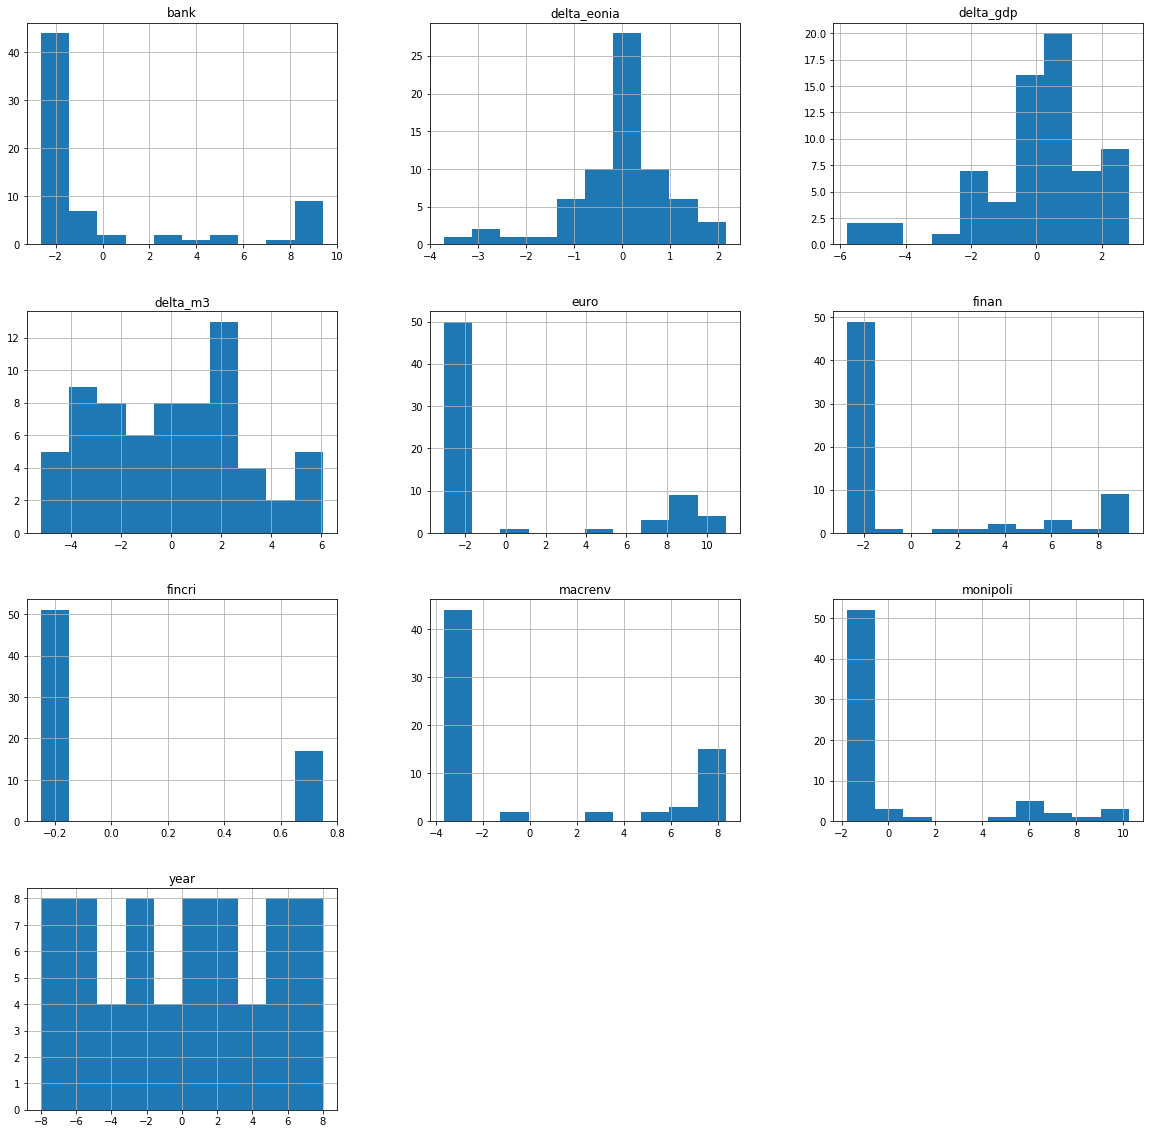

In [426]:
# centrer variables:
masterframe5_judg.columns = ['macrenv', 'euro', 'monipoli', 'bank', 'finan', 'delta_eonia', 'delta_gdp', 'delta_m3', 'fincri', 'year']
masterframe5b_judg.columns = ['macrenv', 'euro', 'monipoli', 'bank', 'finan', 'delta_eonia', 'delta_gdp', 'delta_m3', 'fincri', 'year']
masterframe5_judg_24.columns = ['macrenv', 'euro', 'monipoli', 'bank', 'finan', 'delta_eonia', 'delta_gdp', 'delta_m3', 'fincri', 'year']
masterframe5b_judg_24.columns = ['macrenv', 'euro', 'monipoli', 'bank', 'finan', 'delta_eonia', 'delta_gdp', 'delta_m3', 'fincri', 'year'] 


def center(df):
    result = df.copy()
    for column_name in df.columns:
        mean = df[column_name].mean()

        result[column_name] = (df[column_name] - mean)
    return result


masterframe5_judg_cent = center(masterframe5_judg)
masterframe5b_judg_cent = center(masterframe5b_judg)


masterframe5_judg_24_cent = center(masterframe5_judg_24)
masterframe5b_judg_24_cent = center(masterframe5b_judg_24)



masterframe5_judg_cent.hist(figsize = (20,20))





masterframe5b_judg_24_cent

In [427]:
# # centrer variables:

# masterframe5_judg.columns = ['macrenv', 'euro', 'monipoli', 'bank', 'finan', 'delta_eonia', 'delta_gdp', 'delta_m3', 'fincri', 'year']
# masterframe5b_judg.columns = ['macrenv', 'euro', 'monipoli', 'bank', 'finan', 'delta_eonia', 'delta_gdp', 'delta_m3', 'fincri', 'year']
# masterframe5_judg_24.columns = ['macrenv', 'euro', 'monipoli', 'bank', 'finan', 'delta_eonia', 'delta_gdp', 'delta_m3', 'fincri', 'year']
# masterframe5b_judg_24.columns = ['macrenv', 'euro', 'monipoli', 'bank', 'finan', 'delta_eonia', 'delta_gdp', 'delta_m3', 'fincri', 'year'] 


# master5aaaab_24 = masterframe5b_judg_24.drop(columns=['delta_eonia', 'delta_gdp', 'delta_m3', 'year'])
# master5aaaa_24 = masterframe5_judg_24.drop(columns=['delta_eonia', 'delta_gdp', 'delta_m3', 'year'])

# master5aaaab_12 = masterframe5b_judg.drop(columns=['delta_eonia', 'delta_gdp', 'delta_m3', 'year'])
# master5aaaa_12 = masterframe5_judg.drop(columns=['delta_eonia', 'delta_gdp', 'delta_m3', 'year'])



# master5b_24 = masterframe5b_judg_24.drop(columns=['macrenv', 'euro','monipoli','bank', 'finan', 'fincri'])
# master5_24 = masterframe5_judg_24.drop(columns=['macrenv', 'euro','monipoli','bank', 'finan', 'fincri'])

# master5b_12 = masterframe5b_judg.drop(columns=['macrenv', 'euro','monipoli','bank', 'finan', 'fincri'])
# master5_12 = masterframe5_judg.drop(columns=['macrenv', 'euro','monipoli','bank', 'finan', 'fincri'])


# def center(df):
#     result = df.copy()
#     for column_name in df.columns:
#         mean = df[column_name].mean()

#         result[column_name] = (df[column_name] - mean)
#     return result



# masterframe5b_judg_24_cent = center(master5b_24)
# masterframe5_judg_24_cent = center(master5_24)
# masterframe5b_judg_12_cent = center(master5b_12)
# masterframe5_judg_12_cent = center(master5_12)


# masterframe5_judg_cent.hist(figsize = (20,20))



# masterframe5b_judg_24_cent = pd.concat([master5aaaab_24, masterframe5b_judg_24_cent], axis=1, sort=False)
# masterframe5_judg_24_cent = pd.concat([master5aaaab_24, masterframe5_judg_24_cent], axis=1, sort=False)
# masterframe5b_judg_cent = pd.concat([master5aaaab_12, masterframe5b_judg_12_cent], axis=1, sort=False)
# masterframe5_judg_cent = pd.concat([master5aaaab_12, masterframe5_judg_12_cent], axis=1, sort=False)

,err_12_month,err_24_month
count,68.000000,68.000000
mean,-0.098235,0.028971
std,0.906976,0.997653
min,-2.040000,-2.100000
25%,-0.610000,-0.552500
50%,-0.290000,-0.135000
75%,0.427500,0.640000
max,2.500000,2.230000


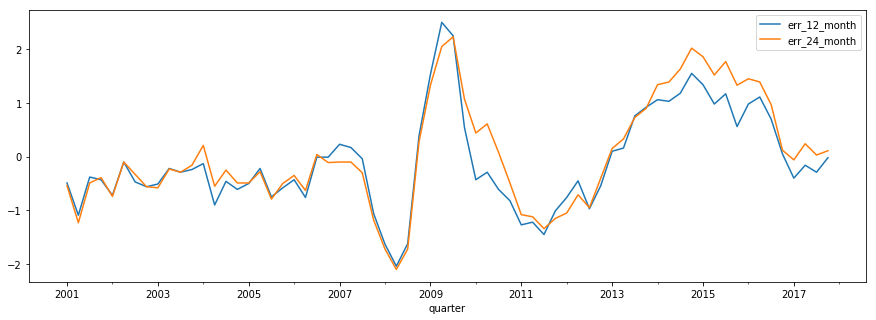

In [428]:
# 2) bulid Dataframe for dependent variable


spf_errs = pd.read_excel('SPF_errors.xlsx', sheet_name = 'data')
spf_errs = spf_errs.set_index('quarter')
spf_errs = spf_errs.resample('Q').sum().sort_index(ascending = False)
spf_errs = spf_errs[:68]



# ABSOLUTE VALUES
# spf_errs = spf_errs.abs()
spf_errs.plot(kind ='line', figsize = (15,5))
spf_errs.describe()






# DataFrame shows the quarterly inflation forecast error of SPF 12 and 24 month rolling forecast.
# The HICP inflation is taken from the ECBs StatisticalDataWarehouse (ICP.M.U2.N.000000.3.ANR),
# as well as the SPF 12 month rolling forecast (SPF.M.U2.HICP.POINT.P12M.Q.AVG) and the 24 month rolling forecast
# (SPF.M.U2.HICP.POINT.P24M.Q.AVG)

In [429]:
spf_errs_judg = spf_errs.reset_index()
spf_errs_judg = spf_errs_judg.drop('quarter', axis=1)

spf_errs_judg

,err_12_month,err_24_month
0,-0.02,0.11
1,-0.29,0.03
2,-0.16,0.24
3,-0.40,-0.06
4,0.05,0.12
5,0.70,0.97
6,1.11,1.39
7,0.98,1.45
8,0.56,1.33
9,1.17,1.77


# !!! Please modify these ones as shown in the .png (12_month_hicp, two graphs)

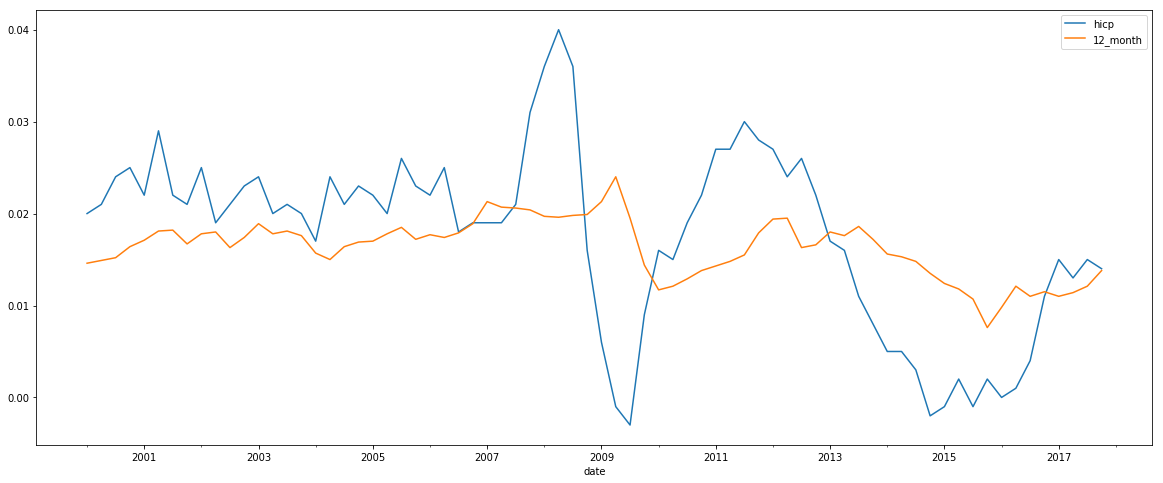

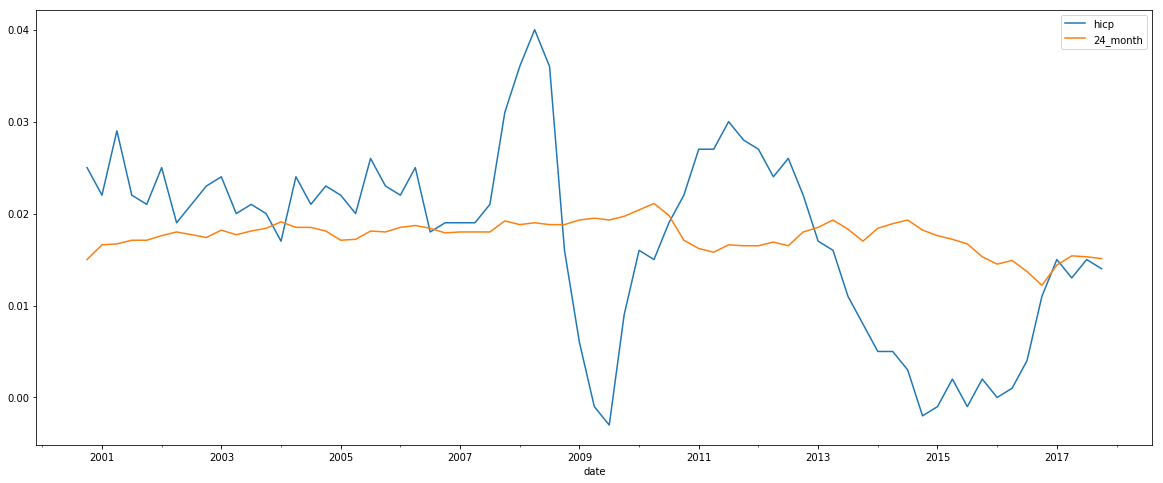

In [466]:
forecasts = pd.read_excel('SPF_errors.xlsx', sheet_name='Tabelle1', index_col=[0], usecols=[0,1,2,4])
forecast12 = forecasts.drop(columns='24_month')
forecast24 = forecasts.drop(columns='12_month')
forecast12[:-4].plot(kind ='line', figsize = (20,8))
forecast24[:-7].plot(kind ='line', figsize = (20,8))


# 5) Correlations

In [431]:
# correlation among topics
# import matplotlib.pyplot as plt
# import seaborn as sns
# fig, ax = plt.subplots(figsize=(10,5))

# mask5 = np.zeros_like(dfw5_annually.corr())
# mask5[np.triu_indices_from(mask5)] = True
# sns.heatmap(data=dfw5_annually.corr(),mask=mask5,vmin=-1, vmax=1, square=True, cmap="YlGnBu",linewidths=.5, ax=ax)


In [432]:
# fig, ax = plt.subplots(figsize=(10,5))
# mask10 = np.zeros_like(dfw10_annually.corr())
# mask10[np.triu_indices_from(mask10)] = True
# sns.heatmap(data=dfw10_annually.corr(),mask=mask10,vmin=-1, vmax=1, square=True, cmap="YlGnBu",linewidths=.5, ax=ax)

In [433]:
# fig, ax = plt.subplots(figsize=(10,5))
# mask15 = np.zeros_like(dfw15_annually.corr())
# mask15[np.triu_indices_from(mask15)] = True
# sns.heatmap(data=dfw15_annually.corr(),mask=mask15,vmin=-1, vmax=1, square=True, cmap="YlGnBu",linewidths=.5, ax=ax)

In [434]:
# # correlation among control variables

# mask = np.zeros_like(ndf.corr())
# mask[np.triu_indices_from(mask)] = True
# print(sns.heatmap(data=ndf.corr(), mask=mask, vmin=-1, vmax=1, square=True, cmap="YlGnBu",linewidths=.5))
# ndf.corr()

# # correlations among control variables (>0,5):

# # intr, euri6.        0,50                       # euriday, eurimon:   0,99
# # intr, euri12:       0,57                       # euriday, euri3mon:  0,98
                                                 # euriday, euri6mon:  0,96
# debt, euriday:      0.65                       # euriday, euri12mon: 0,92
# debt, eurimon:      0,63                       # euriday, gdp:       0,84
# debt, euri3mon:     0,63                       # euriday, unempl:   -0,77
# debt, euri6mon:     0,63                       # eurimon, euri3:     0,99
# debt, euri12mon:    0,57                       # eurimon, euri6:     0,98
# debt, gdp:         -0,71                       # eurimon, euri12:    0,95
# debt, unempl:       0,79                       # eurimon, gdp:       0,86
                                                 # eurimon, unempl:   -0,78
# franc, yen:         0,56                       # eurimon3, euri6:    0,99
# franc, dollar:      0,55                       # eurimon3, euri12:   0,97
# yen, dollar:        0,62                       # eurimon3, gdp:      0,87
                                                 # eurimon3, unempl:  -0,78
# gdp, unempl:       -0,88                       # euri6, euri12:      0,99
                                                 # euri6, gdp:         0,86
# m3, ficri:          0,62                       # euri6, unempl:     -0,77
                                                 # euri12, gdp:        0,84
                                                 # euri12, unempl:    -0,75
        

In [435]:
# # correlation between topics and controll variables

# mask10 = np.zeros_like(masterframe10.corr())
# mask10[np.triu_indices_from(mask10)] = True
# fig, ax = plt.subplots(figsize=(10,7))
# sns.heatmap(data=masterframe10.corr(), mask=mask10, vmin=-1, vmax=1, square=True, cmap="YlGnBu",linewidths=.9, ax=ax)


In [436]:
# files = ['10_years_int_rate.xlsx','ea_debt.xlsx','euribor_int_rates_changes.xlsx','exchange_rates.xlsx','gdp_growth.xlsx','m3_growth.xlsm','unemployment_rate.xlsx', 'time.xlsx']

# dataframes = [pd.ExcelFile(f) for f in files]
# intr = dataframes[0].parse('annually_aggregated')
# debt = dataframes[1].parse('annually_aggregated')
# euribor = dataframes[2].parse('annually_aggregated')
# exch = dataframes[3].parse('annually_aggregated')
# gdp = dataframes[4].parse('annually_aggregated')
# m3 = dataframes[5].parse('annually_aggregated')
# unempl = dataframes[6].parse('annually_aggregated')
# time = dataframes[7].parse('Tabelle1')

# frames = [intr] 
# frames.append(euribor.delta_euriday_an)
# frames.append(gdp.delta_gdp_an) 
# frames.append(m3.delta_m3_an) 
# frames.append(time.fincri)
# frames.append(time.year) 

# frames.append(exch.delta_dollar_an)
# frames.append(debt.delta_debt_an)
# frames.append(euribor.delta_eurimon_an)
# frames.append(euribor.delta_euri3mon_an) 
# frames.append(euribor.delta_euri6mon_an)
# frames.append(euribor.delta_euri12mon_an) 
# frames.append(exch.delta_pound_an) 
# frames.append(exch.delta_franc_an) 
# frames.append(exch.delta_yen_an) 
# frames.append(unempl.delta_unempl_an)
# frames.append(time.qter) 




# '''TAKE EONIA CHANGES OR TAKE ABSOLUTE EONIA? -> consider standartization'''


# neww_df = pd.concat(frames, axis=1)

# ndff = neww_df.set_index('quarter')
# ndff = ndff.resample('Q').sum().sort_index(ascending = False)

# masterframe = pd.concat([dfw5, ndff], axis = 1)

# masterframe = masterframe.abs()

# import matplotlib.pyplot as plt
# import seaborn as sns
# fig, ax = plt.subplots(figsize=(15,15))

# mask5 = np.zeros_like(masterframe.corr())
# mask5[np.triu_indices_from(mask5)] = True
# sns.heatmap(data=masterframe.corr(),mask=mask5,vmin=-1, vmax=1, square=True, cmap="YlGnBu",linewidths=.5, ax=ax)

In [437]:
# def get_redundant_pairs(df):
#     '''Get diagonal and lower triangular pairs of correlation matrix'''
#     pairs_to_drop = set()
#     cols = df.columns
#     for i in range(0, df.shape[1]):
#         for j in range(0, i+1):
#             pairs_to_drop.add((cols[i], cols[j]))
#     return pairs_to_drop

# def get_top_abs_correlations(df, n=5):
#     au_corr = df.corr().abs().unstack()
#     labels_to_drop = get_redundant_pairs(df)
#     au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
#     return au_corr[0:n]

# print("Top Absolute Correlations")
# print(get_top_abs_correlations(masterframe, 60))

In [438]:
# topicsspf = pd.concat([dfw5, spf_errs], axis=1)
# topicsspf.corr()

# 6) Run regressions

In [439]:
# masterframe5_judg_cent_reg = sm.add_constant(masterframe5_judg_cent)
# model5 = sm.OLS(spf_errs_judg.err_12_month, masterframe5_judg_cent_reg)
# result5 = model5.fit()
# print(result5.summary())


In [447]:
masterframe5b_judg_cent_reg = sm.add_constant(masterframe5b_judg_cent)
model5a = sm.OLS(spf_errs_judg.err_12_month, masterframe5b_judg_cent_reg)
result5a = model5a.fit()
print(result5a.summary())

                            OLS Regression Results                            
Dep. Variable:           err_12_month   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     12.75
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.69e-11
Time:                        21:30:18   Log-Likelihood:                -49.404
No. Observations:                  68   AIC:                             120.8
Df Residuals:                      57   BIC:                             145.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0982      0.066     -1.482      

In [441]:
# masterframe5_judg_24_cent_reg = sm.add_constant(masterframe5_judg_24_cent)
# model5b = sm.OLS(spf_errs_judg.err_24_month[:64], masterframe5_judg_24_cent_reg)
# result5b = model5b.fit()
# print(result5b.summary())


# 5 topics on 24 month forecast

In [448]:
masterframe5b_judg_24_cent_reg = sm.add_constant(masterframe5b_judg_24_cent)
model5ab = sm.OLS(spf_errs_judg.err_24_month[:64], masterframe5b_judg_24_cent_reg)
result5ab = model5ab.fit()
print(result5ab.summary())


# 5 topics on 24 month forecast

                            OLS Regression Results                            
Dep. Variable:           err_24_month   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     22.45
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.16e-15
Time:                        21:30:23   Log-Likelihood:                -37.944
No. Observations:                  64   AIC:                             97.89
Df Residuals:                      53   BIC:                             121.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0722      0.060      1.200      

In [450]:
from statsmodels.iolib.summary2 import summary_col

dfoutput = summary_col([result5a,result5ab], float_format= '%.3f', model_names=('12 month','24 month') ,stars=True, info_dict = {'N':lambda x: "{0:d}".format(int(x.nobs)),'R2':lambda x: "{:.2f}".format(x.rsquared)}, regressor_order = ['const','euro', 'macrenv', 'finan', 'bank', 'monipoli', 'delta_eonia', 'delta_gdp', 'delta_m3']).as_latex()
print(dfoutput)

\begin{table}
\caption{}
\begin{center}
\begin{tabular}{lcc}
\hline
             &  12 month &  24 month  \\
\midrule
\midrule
const        & -0.098    & 0.072      \\
             & (0.066)   & (0.060)    \\
euro         & 0.220***  & 0.208***   \\
             & (0.029)   & (0.037)    \\
macrenv      & -0.031    & 0.029      \\
             & (0.028)   & (0.027)    \\
finan        & 0.162***  & 0.027      \\
             & (0.034)   & (0.032)    \\
bank         & 0.156***  & -0.174***  \\
             & (0.039)   & (0.035)    \\
monipoli     & -0.116**  & 0.258***   \\
             & (0.045)   & (0.041)    \\
delta\_eonia & 0.237     & 0.248      \\
             & (0.170)   & (0.150)    \\
delta\_gdp   & -0.145    & 0.043      \\
             & (0.107)   & (0.095)    \\
delta\_m3    & 0.324***  & 0.098*     \\
             & (0.055)   & (0.050)    \\
fincri       & -1.022*** & 0.546**    \\
             & (0.272)   & (0.244)    \\
year         & -0.184*** & 0.306***   \\
            

In [444]:
dfoutpu2t = summary_col([result3,result5,result6,result7,result8,result10])
print(dfoutpu2t)

NameError: name 'result7' is not defined

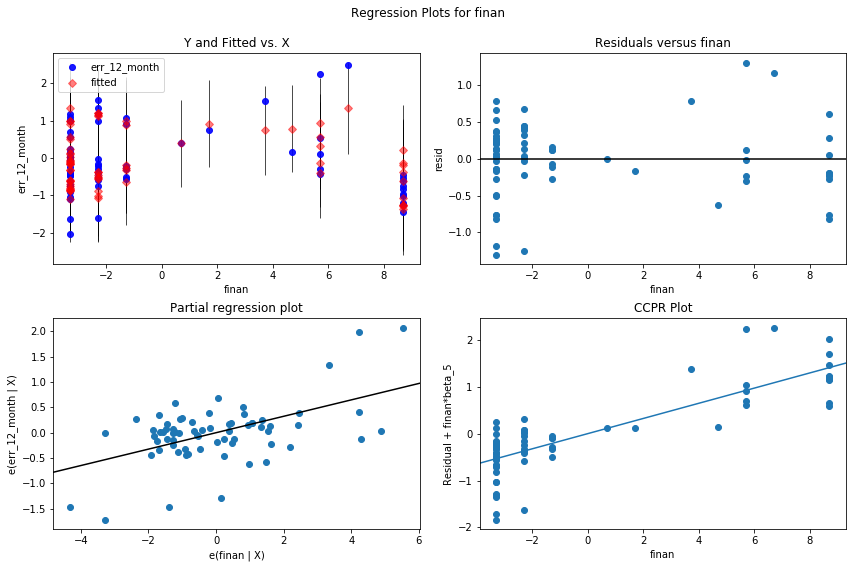

In [445]:
from __future__ import print_function
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols


fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(result5a, "finan", fig=fig)

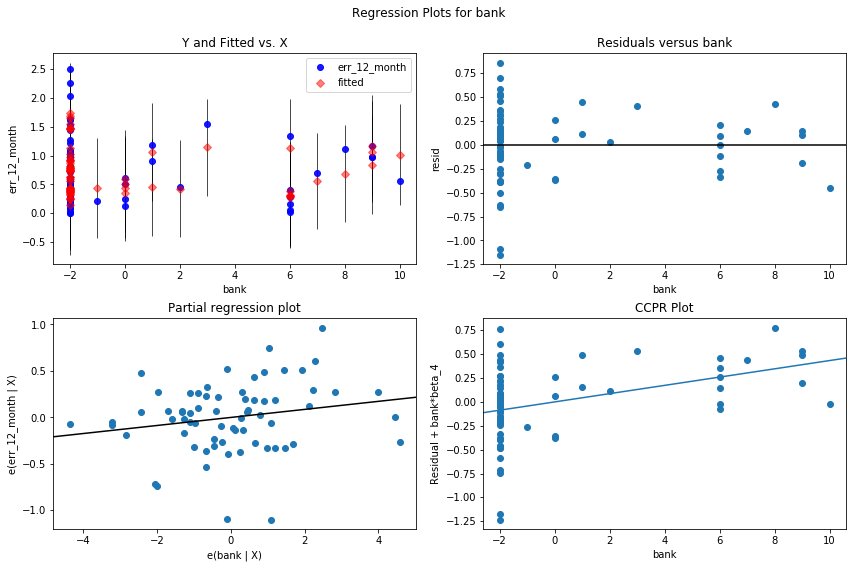

In [296]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(result5a, "bank", fig=fig)

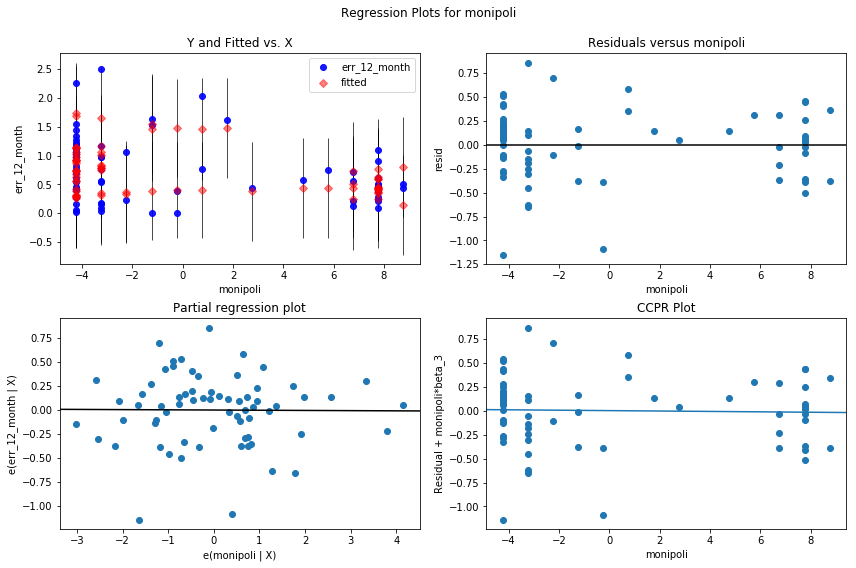

In [297]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(result5a, "monipoli", fig=fig)

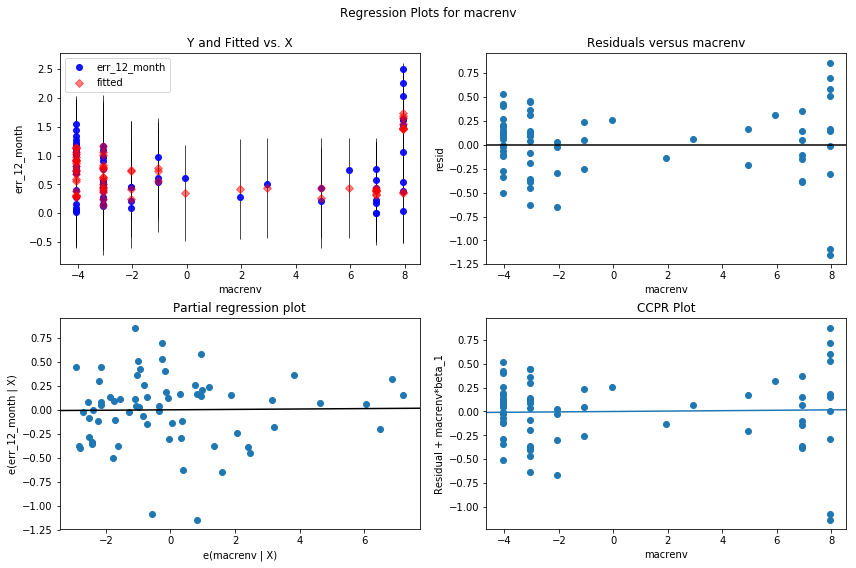

In [298]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(result5a, "macrenv", fig=fig)

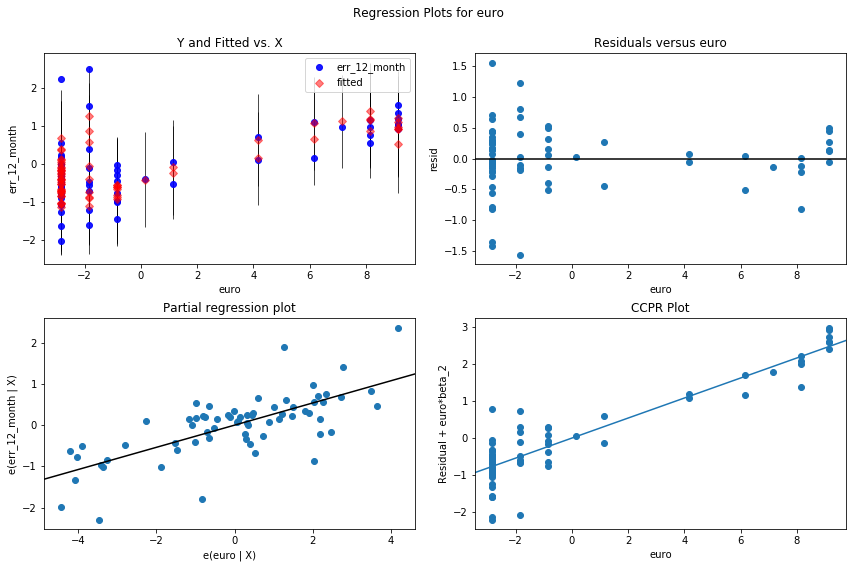

In [281]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(result5a, "euro", fig=fig)

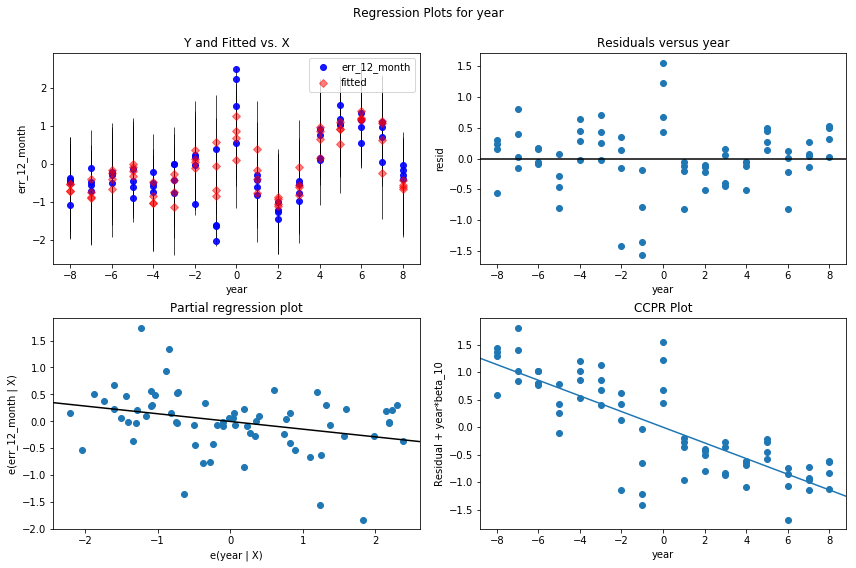

In [282]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(result5a, "year", fig=fig)

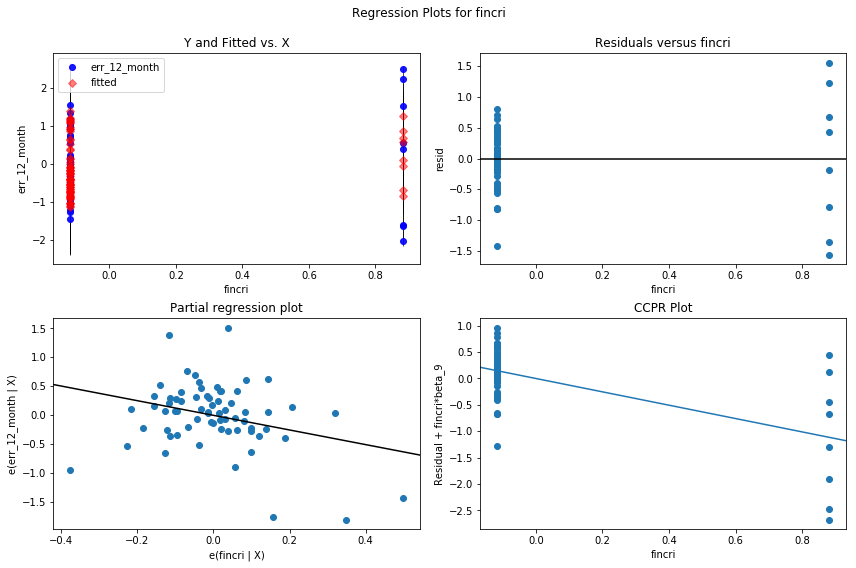

In [283]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(result5a, "fincri", fig=fig)